In [27]:
# Imports
from matplotlib import pyplot as plt
import csv
import pandas as pd
from scipy.fft import fft, fftfreq
import numpy as np

In [28]:
# Global variables
fs = 200

In [29]:
# Helper functions
def add_time(data, fs):
    return np.arange(0, len(data) / fs, 1 / fs)

def plot_data(data, label_accel, label_gyro, axes):
    data.plot(x="time", y=["accel_x", "accel_y", "accel_z"], title=label_accel, xlabel="Time (seconds)", ylabel="Amplitude", ax=axes[0,0])
    data.plot(x="time", y=["gyro_x", "gyro_y", "gyro_z"], title=label_gyro, xlabel="Time (seconds)", ylabel="Amplitude", ax=axes[1,0])
    
def subtract_mean(data):
    for i in data:
        data[i] = data[i] - sum(data[i]) / len(data[i])
    return data
    
def extract_fft(col):
    data = fft(np.array(col, dtype=np.float64))
    return 2.0/fs * np.abs(data[:fs // 2])

def plot_fft(freq, df, title, legend, axes):
    df['freq'] = freq
    df.plot(x='freq', y=legend, ax=axes, title=title, xlabel="Frequency (Hz)", ylabel="Power")

def manage_fft(data, fs, title, axes):
    # Get fft data, need to convert to np array for fft
    accel_df = pd.DataFrame()
    accel_df['accel_x'] = extract_fft(data['accel_x'])
    accel_df['accel_y'] = extract_fft(data['accel_y'])
    accel_df['accel_z'] = extract_fft(data['accel_z'])
    
    gyro_df = pd.DataFrame()
    gyro_df['gyro_x'] = extract_fft(data['gyro_x'])
    gyro_df['gyro_y'] = extract_fft(data['gyro_y'])
    gyro_df['gyro_z'] = extract_fft(data['gyro_z'])    
    
    # Get fft frequencies
    freq = fftfreq(fs, 1/fs)[:fs // 2]
    
    # Plot ffts
    accel_title = f"{title} Accel FFT"
    legend = ["accel_x", "accel_y", "accel_z"]
    plot_fft(freq, accel_df, accel_title, legend, axes[0,1])
    
    plt.figure()
    gyro_title = f"{title} Gyro FFT"
    legend = ["gyro_x", "gyro_y", "gyro_z"]
    plot_fft(freq, gyro_df, gyro_title, legend, axes[1,1])


In [ ]:
# Collect data into dataframes
alexa_data = pd.read_csv("alexa_01.csv")
play_data = pd.read_csv("play_01.csv")
despacito_data = pd.read_csv("despacito_01.csv")
beethoven_data = pd.read_csv("beethoven_01.csv")
still_data = pd.read_csv("still_01.csv")

In [ ]:
# Add time to dataframes
alexa_data['time'] = add_time(alexa_data, fs)
play_data['time'] = add_time(play_data[0:], fs)
despacito_data['time'] = add_time(despacito_data, fs)
beethoven_data['time'] = add_time(beethoven_data, fs)
still_data['time'] = add_time(still_data, fs)

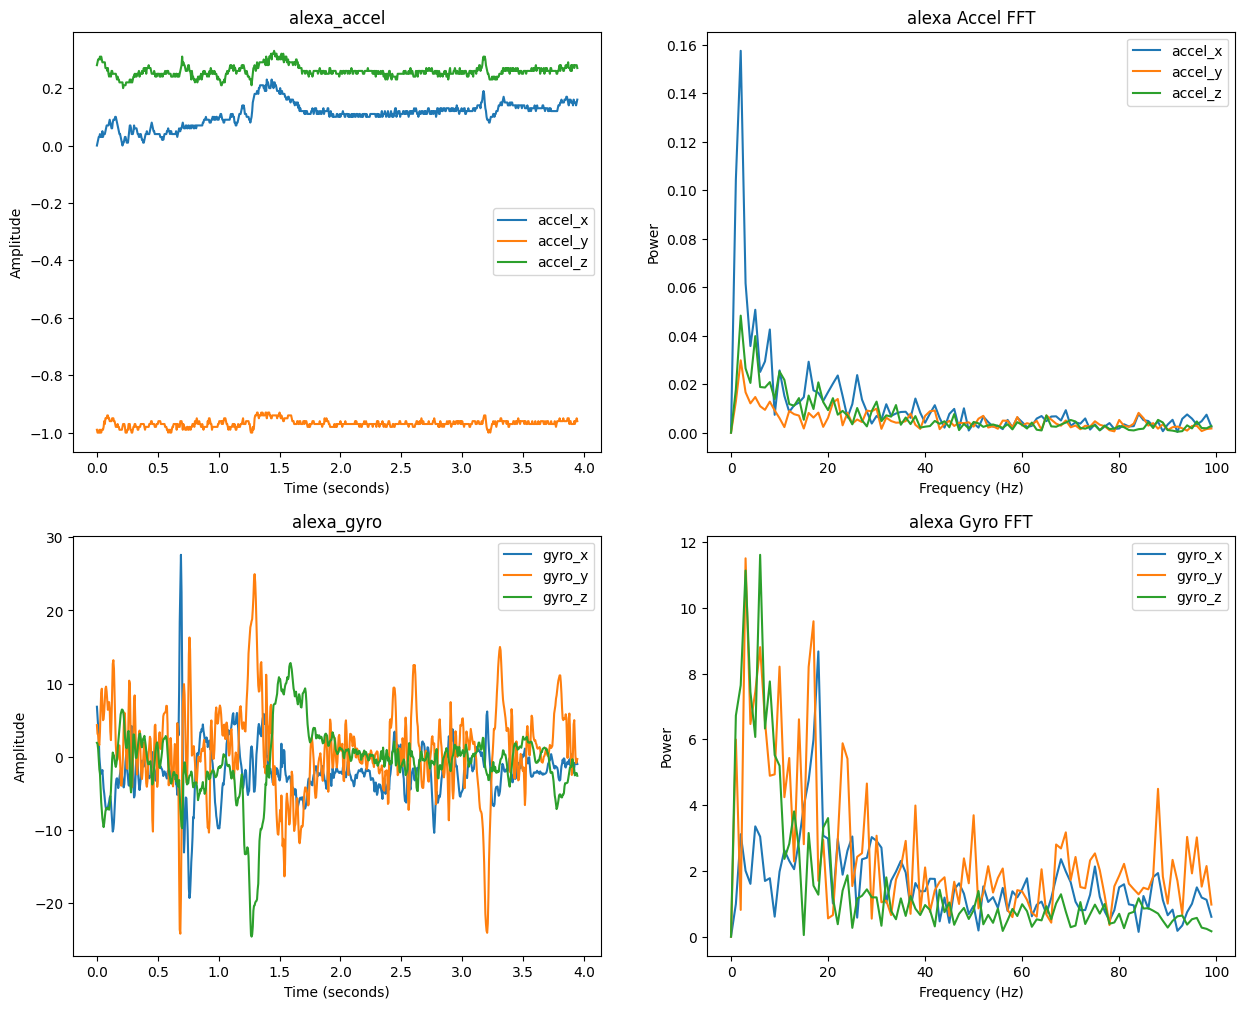

<Figure size 640x480 with 0 Axes>

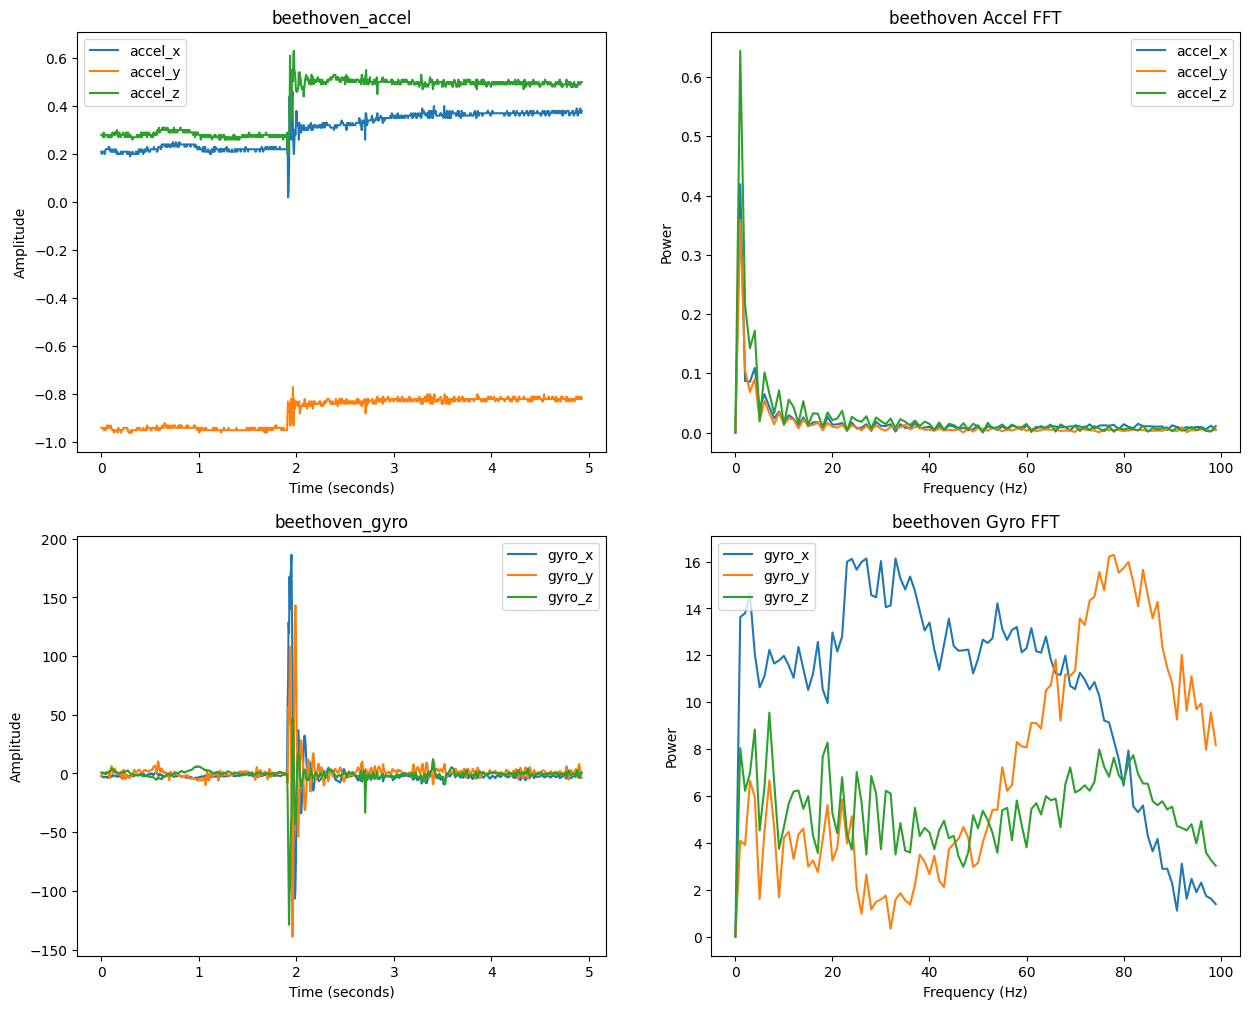

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot alexa raw data
fig, axes1 = plt.subplots(2, 2, figsize=(15,12))
plot_data(alexa_data, "alexa_accel", "alexa_gyro", axes1)
# 0 - mean the data
alexa_data = subtract_mean(alexa_data)
# Plot alexa fft
manage_fft(alexa_data, fs, "alexa", axes1)

# Plot play raw data
fig, axes2 = plt.subplots(2, 2, figsize=(15,12))
plot_data(play_data, "play_accel", "play_gyro", axes2)
# 0 - mean the data
play_data = subtract_mean(play_data)
# Plot play FFT
manage_fft(play_data, fs, "play", axes2)

# Plot despacito raw data
fig, axes3 = plt.subplots(2, 2, figsize=(15,12))
plot_data(despacito_data, "despacito_accel", "despacito_gyro", axes3)
# 0 - mean the data
despacito_data = subtract_mean(despacito_data)
# Plot despacito FFT
manage_fft(despacito_data, fs, "despacito", axes3)

# Plot beethoven raw data
fig, axes4 = plt.subplots(2, 2, figsize=(15,12))
plot_data(beethoven_data, "beethoven_accel", "beethoven_gyro", axes4)
# 0 - mean the data
beethoven_data = subtract_mean(beethoven_data)
# Plot beethoven FFT
manage_fft(beethoven_data, fs, "beethoven", axes4)

# Plot beethoven raw data
fig, axes5 = plt.subplots(2, 2, figsize=(15,12))
plot_data(still_data, "still_accel", "still_gyro", axes4)
# 0 - mean the data
still_data = subtract_mean(still_data)
# Plot beethoven FFT
manage_fft(still_data, fs, "still", axes4)
